# Simple Linear Regression 

In this example we will consider sales based on 'TV' marketing budget. 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv("tvmarketing.csv")


Now, let's check the structure of the advertising dataset.

In [3]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [7]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [8]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

E:\anacona\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


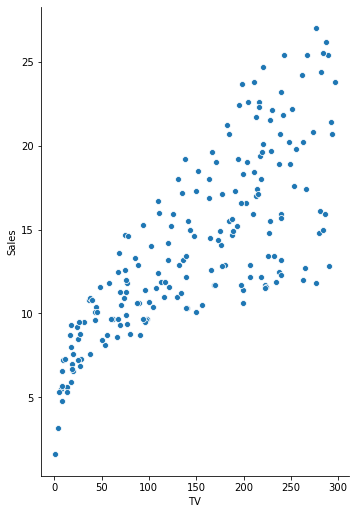

In [9]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [10]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [12]:
A,B=20,40 ## HOW TO DECLARE MULTIPLE VARIABLE TOGETHER..[EXAMPLE]

In [13]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [14]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [15]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [18]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Performing Linear Regression

In [20]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
model1=lr.fit(X_train, y_train)

## Coefficients Calculation

In [17]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [18]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [19]:
type(y_pred)

numpy.ndarray

In [20]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

#### Computing RMSE and R^2 Values

In [21]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'Sales')

In [22]:
y_test-y_pred

126   -0.752345
104    2.634663
99     3.923891
92     2.287859
111    3.571923
167   -4.405320
116   -1.262098
96    -4.477544
52     5.548306
69     5.229707
164   -0.539156
124    2.039190
182   -0.902817
154   -0.121870
125   -0.444236
196   -1.669717
194    3.349680
177   -3.203516
163    3.408016
31    -0.339218
11     0.427351
73    -2.006424
15     6.324750
41     1.880302
97    -0.087027
128    7.466966
133    2.390215
82     0.809083
139    5.112973
123    2.486509
83     3.429915
65    -0.897984
151   -1.015846
162   -0.849768
170   -0.914534
77     1.607402
32    -1.909209
173   -3.119821
174   -5.830678
85    -0.772956
168    0.094803
112   -1.059252
171   -0.138481
181   -4.949339
7      0.621352
46    -0.560479
75     0.924529
28     0.341791
29     0.227621
195   -1.165865
40     0.194619
153    4.045337
115    2.118383
64     4.914530
59     1.613341
1      1.341202
192   -1.889420
136    1.320002
152    0.422456
161    2.325510
Name: Sales, dtype: float64

Text(0, 0.5, 'ytest-ypred')

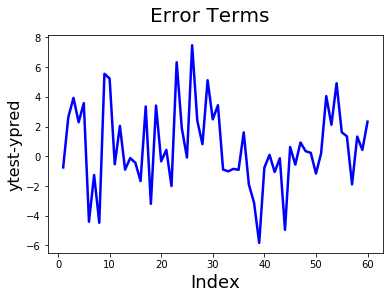

In [23]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [25]:
r_squared = r2_score(y_test, y_pred)

In [26]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

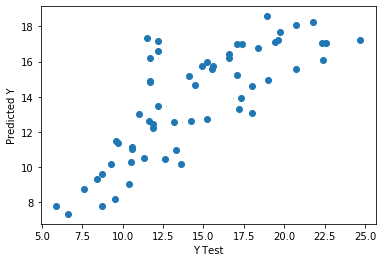

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')